In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df=pd.read_csv("health_risk.csv")

In [3]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [5]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


In [6]:
#Binary
df["high_risk_flag"].unique()

array([1, 0])

In [7]:
#Balanced Data
df["high_risk_flag"].value_counts()

high_risk_flag
0    502
1    498
Name: count, dtype: int64

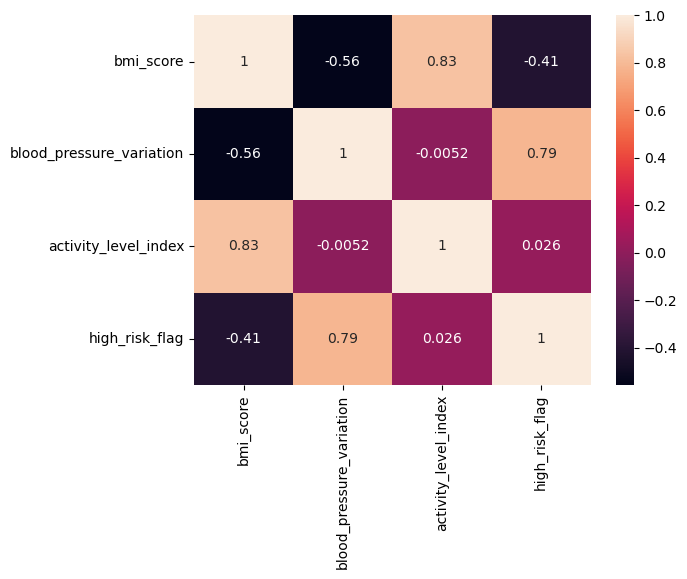

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

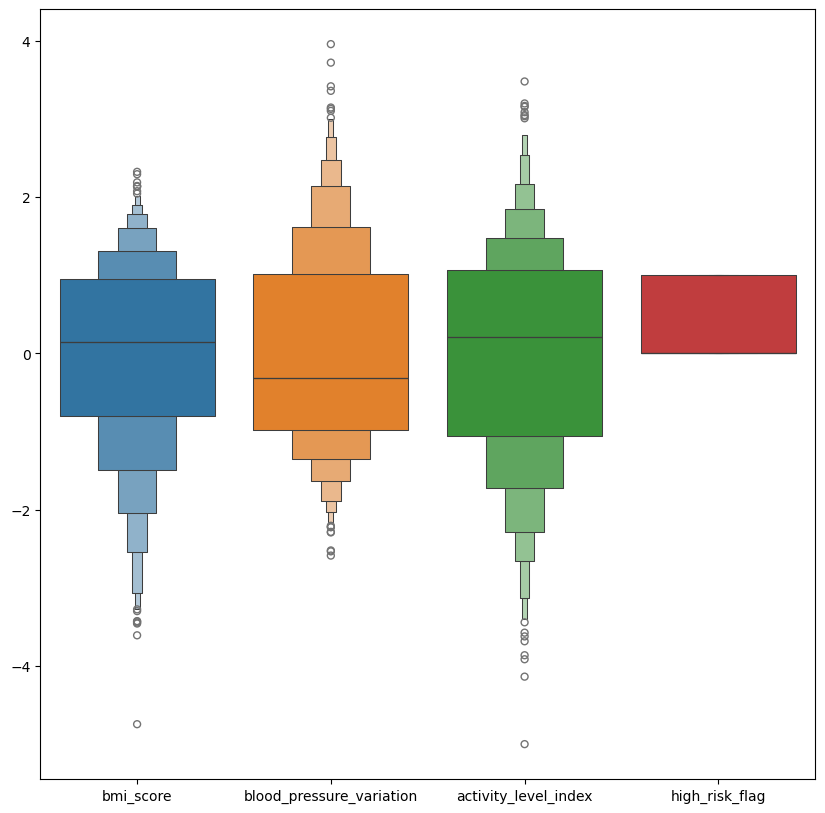

In [9]:
plt.figure(figsize=(10,10))
sns.boxenplot(df)
plt.show()

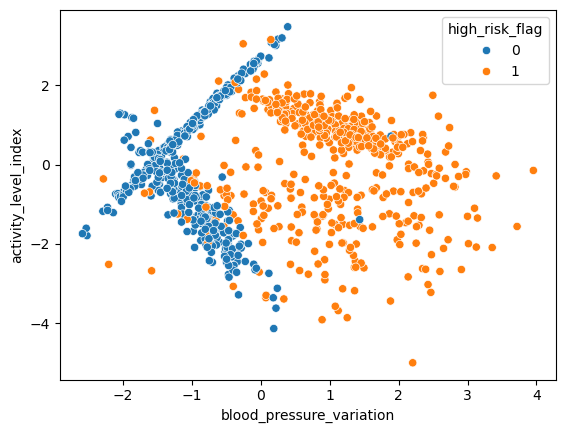

In [10]:
sns.scatterplot(x=df["blood_pressure_variation"], y=df["activity_level_index"],hue=df["high_risk_flag"])
plt.show()

In [11]:
X=df.drop("high_risk_flag",axis=1)
y=df["high_risk_flag"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [13]:
#This data has already scaled. We dont need to use Scaler.
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()

In [14]:
classifier=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights=("distance"))
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [15]:
y_pred=classifier.predict(X_test)

In [16]:
y_test.value_counts()

high_risk_flag
0    126
1    124
Name: count, dtype: int64

Accuracy Score: 0.964
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       126
           1       0.98      0.94      0.96       124

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



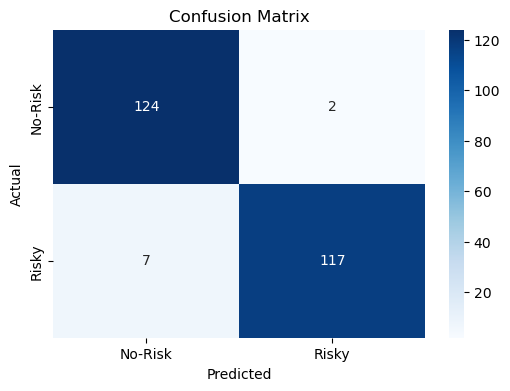

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No-Risk', 'Risky',],
            yticklabels=['No-Risk', 'Risky',])

plt.xlabel('Predicted')  
plt.ylabel('Actual')     
plt.title('Confusion Matrix')
plt.show()